# What metrics should be used for evaluating a model on an imbalanced data set

* Ref: [https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba](https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba)

**TPR (True Positive Rate) = # True positives / # positives = Recall = TP / (TP + FN)**

**FPR (False Positive Rate) = # False positives / # negatives = FP / (FP + TN)**

**Precision = # True positives / # predicted positive = TP / (TP + FP)**

**Recall = # True positives / # positives = TP / (TP + FN)**

* Precision is measuring the probability of correct detection of positive values
* FPR and TPR (ROC metrics) measure the ability to distinguish between the classes

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, roc_curve

In [ ]:
def plot_model_boundaries(model, xmin=0, xmax=1.5, ymin=0, ymax=1.5, npoints=40):
    xx = np.linspace(xmin, xmax, npoints)
    yy = np.linspace(ymin, ymax, npoints)
    xv, yv = np.meshgrid(xx, yy) # 把 xx, yy 的值組成格點座標 (xv, yv)
    xv, yv = xv.flatten(), yv.flatten()
    labels = model.predict(np.c_[xv, yv])
    plt.scatter(xv[labels==1], yv[labels==1], color='r', alpha=0.02, marker='o', s=300)
    plt.scatter(xv[labels==0], yv[labels==0], color='b', alpha=0.02, marker='o', s=300)
    plt.ylim([xmin, xmax])
    plt.xlim([ymin, ymax])

In [ ]:
np.random.seed(1)

* `np.zeros((m, n))` 產生 $m \times n$ 的 0 矩陣
* `np.random.rand(m, n)` 產生 $m \times n$ 的矩陣，矩陣元素的值的範圍是 0~1
* `np.concatenate(A, B)` 把兩矩陣一垂直方向疊放在一起

### Example:
* 真實: 9 正 1 負
* 預測: 9 正 1 負

TP = 9, FN = 0, FP = 0, TN = 1

FPR = FP/(FP + TN) = 0/1 = 0

TPR = TP/(TP + FN) = 9/9 = 1

Precision = TP/(TP + FP) = 9/9 = 1

Recall = TP/(TP + FN) = 9/9 = 1

In [ ]:
x = np.concatenate([np.zeros((8, 2)), np.zeros((1, 2)), np.zeros((1, 2))]) + 0.8 * np.random.rand(10, 2)
x[-1, 0] += 1
x[-1, -1] += 1
y = np.concatenate([np.ones(9), np.zeros(1)])
print('x=', x)
print('y=', y)

x= [[3.33617604e-01 5.76259595e-01]
 [9.14998539e-05 2.41866058e-01]
 [1.17404713e-01 7.38708758e-02]
 [1.49008169e-01 2.76448582e-01]
 [3.17413979e-01 4.31053387e-01]
 [3.35355612e-01 5.48175600e-01]
 [1.63561800e-01 7.02493949e-01]
 [2.19100746e-02 5.36374008e-01]
 [3.33843842e-01 4.46951863e-01]
 [1.11230955e+00 1.15848119e+00]]
y= [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


In [ ]:
model = LinearSVC()
model.fit(x, y)
predicted_labels = model.predict(x)
print('prediction=', predicted_labels)

prediction= [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


fpr= [0. 0. 1.]
tpr= [0. 1. 1.]
thresholds= [2. 1. 0.]


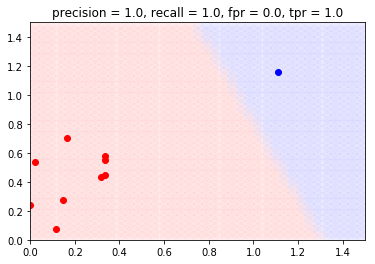

In [ ]:
plot_model_boundaries(model, xmin=0, xmax=1.5, ymin=0, ymax=1.5)
plt.scatter(x[y==0, 0], x[y==0, 1], color='b')
plt.scatter(x[y==1, 0], x[y==1, 1], color='r')

fpr, tpr, thresholds = roc_curve(y, predicted_labels)
print('fpr=', fpr)
print('tpr=', tpr)
print('thresholds=', thresholds)

plt.title('precision = {}, recall = {}, fpr = {}, tpr = {}'.format(precision_score(y, predicted_labels), 
                                                                   recall_score(y, predicted_labels), 
                                                                   fpr[1], 
                                                                   tpr[1]))
plt.show()

### Example: 大部分都是 positive sample 的情況
* 全部的 true positive 都判斷正確，然後還有一些 false positive 時
* 使用 ROC 會比較好
* 真實:  9 正 1 負
* 預測: 10 正 0 負

TP = 9, FN = 0, FP = 1, TN = 0

FPR = FP/(FP + TN) = 1/1 = 1 (FPR 太高 --> 不是好的 classifier)

TPR = TP/(TP + FN) = 9/9 = 1

Precision = TP/(TP + FP) = 9/10 = 0.9

Recall = TP/(TP + FN) = 9/9 = 1

In [ ]:
np.random.seed(1)
x = np.concatenate([np.zeros((8, 2)), np.zeros((1,2)), np.zeros((1,2))]) + 1.2*np.random.rand(10,2)
x[-1,0]+=1
x[-1,-1]+=1
y = np.concatenate([np.ones(9), np.zeros(1)])
print('x=', x)
print('y=', y)

x= [[5.00426406e-01 8.64389392e-01]
 [1.37249781e-04 3.62799087e-01]
 [1.76107069e-01 1.10806314e-01]
 [2.23512254e-01 4.14672872e-01]
 [4.76120969e-01 6.46580081e-01]
 [5.03033417e-01 8.22263400e-01]
 [2.45342700e-01 1.05374092e+00]
 [3.28651118e-02 8.04561012e-01]
 [5.00765763e-01 6.70427794e-01]
 [1.16846433e+00 1.23772179e+00]]
y= [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


In [ ]:
model = LinearSVC()
model.fit(x,y)
predicted_labels = model.predict(x)
print('prediction=', predicted_labels)

prediction= [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


fpr= [0. 1.]
tpr= [0. 1.]
thresholds= [2. 1.]


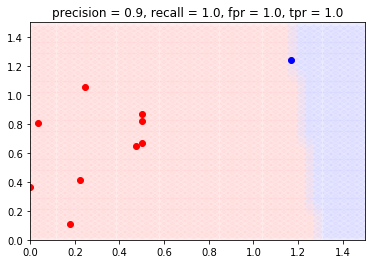

In [ ]:
plot_model_boundaries(model, xmin=0, xmax=1.5, ymin=0, ymax=1.5)
plt.scatter(x[y==0,0],x[y==0,1], color='b')
plt.scatter(x[y==1,0],x[y==1,1], color='r')
fpr, tpr, thresholds = roc_curve(y, predicted_labels)
print('fpr=', fpr)
print('tpr=', tpr)
print('thresholds=', thresholds)

plt.title("precision = {}, recall = {}, fpr = {}, tpr = {}".format(precision_score(y, predicted_labels),
                                                                   recall_score(y, predicted_labels),
                                                                   fpr[1],
                                                                   tpr[1]))
plt.show()

### Example: 大部分都是 negative 的時候
* 沒有偵測到任何的 positive
* 真實:  1 正 9 負
* 預測: 0 正 10 負

TP = 0, FN = 1, FP = 0, TN = 9

FPR = FP/(FP + TN) = 0/9 = 0

TPR = TP/(TP + FN) = 0/1 = 0

Precision = TP/(TP + FP) = 0/0 (X)

Recall = TP/(TP + FN) = 0/1 = 0

In [ ]:
np.random.seed(1)
x = np.concatenate([np.zeros((8, 2)), np.zeros((1,2)), np.zeros((1,2))]) + 1.2*np.random.rand(10,2)
x[-1,0]+=1
x[-1,-1]+=1
y = np.concatenate([np.zeros(9), np.ones(1)])
print('x=', x)
print('y=', y)

x= [[5.00426406e-01 8.64389392e-01]
 [1.37249781e-04 3.62799087e-01]
 [1.76107069e-01 1.10806314e-01]
 [2.23512254e-01 4.14672872e-01]
 [4.76120969e-01 6.46580081e-01]
 [5.03033417e-01 8.22263400e-01]
 [2.45342700e-01 1.05374092e+00]
 [3.28651118e-02 8.04561012e-01]
 [5.00765763e-01 6.70427794e-01]
 [1.16846433e+00 1.23772179e+00]]
y= [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
model = LinearSVC()
model.fit(x,y)
predicted_labels = model.predict(x)
print('prediction=', predicted_labels)

prediction= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


fpr= [0. 1.]
tpr= [0. 1.]
thresholds= [1. 0.]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


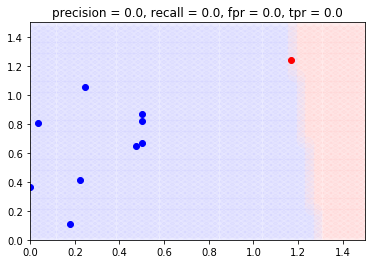

In [ ]:
plot_model_boundaries(model, xmin=0, xmax=1.5, ymin=0, ymax=1.5)
plt.scatter(x[y==0,0],x[y==0,1], color='b')
plt.scatter(x[y==1,0],x[y==1,1], color='r')
fpr, tpr, thresholds = roc_curve(y, predicted_labels)
print('fpr=', fpr)
print('tpr=', tpr)
print('thresholds=', thresholds)

plt.title("precision = {}, recall = {}, fpr = {}, tpr = {}".format(precision_score(y, predicted_labels),
                                                                   recall_score(y, predicted_labels),
                                                                   fpr[0], 
                                                                   tpr[0]))
plt.show()

### Example: 大部分是 positive
* 全部的 true positive 都判斷正確，然後還有一些 false positive 時
* 使用 ROC 會比較好
* 真實: 8 正 2 負
* 預測: 9 正 1 負

TP = 8, FN = 0, FP = 1, TN = 1

FPR = FP/(FP + TN) = 1/2 = 0.5

TPR = TP/(TP + FN) = 8/8 = 1

Precision = TP/(TP + FP) = 8/9 = 0.89

Recall = TP/(TP + FN) = 8/8 = 1

In [ ]:
np.random.seed(1)
x = np.concatenate([np.zeros((8, 2)), np.zeros((1,2)), np.zeros((1,2))]) + 0.9*np.random.rand(10,2)
x[-1,0]+=1
x[-1,-1]+=1
y = np.concatenate([np.zeros(1), np.ones(8), np.zeros(1)])
print('x=', x)
print('y=', y)

x= [[3.75319804e-01 6.48292044e-01]
 [1.02937336e-04 2.72099315e-01]
 [1.32080302e-01 8.31047353e-02]
 [1.67634190e-01 3.11004654e-01]
 [3.57090727e-01 4.84935061e-01]
 [3.77275063e-01 6.16697550e-01]
 [1.84007025e-01 7.90305693e-01]
 [2.46488339e-02 6.03420759e-01]
 [3.75574322e-01 5.02820846e-01]
 [1.12634824e+00 1.17829134e+00]]
y= [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


In [ ]:
model = LinearSVC()
model.fit(x,y)
predicted_labels = model.predict(x)
print('prediction=', predicted_labels)

prediction= [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


fpr= [0.  0.5 1. ]
tpr= [0. 1. 1.]
thresholds= [2. 1. 0.]


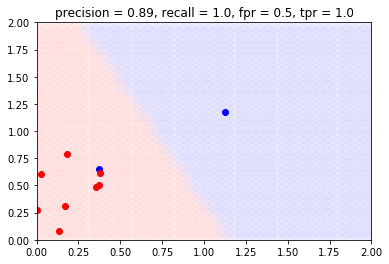

In [ ]:
plot_model_boundaries(model, xmin=0, xmax=2, ymin=0, ymax=2)
plt.scatter(x[y==0,0],x[y==0,1], color='b')
plt.scatter(x[y==1,0],x[y==1,1], color='r')
fpr, tpr, thresholds = roc_curve(y, predicted_labels)
print('fpr=', fpr)
print('tpr=', tpr)
print('thresholds=', thresholds)

plt.title("precision = {:.2f}, recall = {}, fpr = {}, tpr = {}".format(precision_score(y, predicted_labels),
                                                                       recall_score(y, predicted_labels),
                                                                       fpr[1], 
                                                                       tpr[1]))
plt.show()

### Example: 大部分是 negative
* 用 ROC 或是 precision 和 recall 效果差不多
* 真實: 2 正 8 負
* 預測: 1 正 9 負

TP = 1, FN = 1, FP = 0, TN = 8

FPR = FP/(FP + TN) = 0/8 = 0

TPR = TP/(TP + FN) = 1/2 = 0.5

Precision = TP/(TP + FP) = 1/1 = 1

Recall = TP/(TP + FN) = 1/2 = 0.5

In [ ]:
x = np.concatenate([np.zeros((8, 2)), np.zeros((1,2)), np.zeros((1,2))]) + 0.9*np.random.rand(10,2)
x[-1,0]+=1
x[-1,-1]+=1
y = np.concatenate([np.ones(1), np.zeros(8), np.ones(1)])
print('x=', x)
print('y=', y)

x= [[0.64437346 0.72248175]
 [0.08352073 0.46633729]
 [0.77851823 0.74623222]
 [0.74664302 0.24574498]
 [0.05331888 0.60347524]
 [0.53375897 0.60448869]
 [0.37060909 0.17779581]
 [0.26066668 0.12790812]
 [0.70498303 0.37128496]
 [1.03075418 1.56162699]]
y= [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
model = LinearSVC()
model.fit(x,y)
predicted_labels = model.predict(x)
print('prediction=', predicted_labels)

prediction= [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


fpr= [0. 0. 1.]
tpr= [0.  0.5 1. ]
thresholds= [2. 1. 0.]


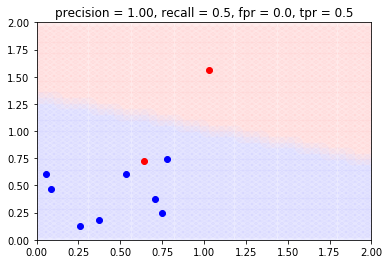

In [ ]:
plot_model_boundaries(model, xmin=0, xmax=2, ymin=0, ymax=2)
plt.scatter(x[y==0,0],x[y==0,1], color='b')
plt.scatter(x[y==1,0],x[y==1,1], color='r')
fpr, tpr, thresholds = roc_curve(y, predicted_labels)
print('fpr=', fpr)
print('tpr=', tpr)
print('thresholds=', thresholds)

plt.title("precision = {:.2f}, recall = {}, fpr = {}, tpr = {}".format(precision_score(y, predicted_labels),
                                                                       recall_score(y, predicted_labels),
                                                                       fpr[1], 
                                                                       tpr[1]))
plt.show()

### Example: 大部分是 positive
* 不是全部的 positive 都被找到
* 用 ROC 或是 precision 和 recall 效果差不多
* 真實: 9 正 1 負
* 預測: 7 正 3 負

TP = 7, FN = 2, FP = 0, TN = 1

FPR = FP/(FP + TN) = 0/1 = 0

TPR = TP/(TP + FN) = 7/9 = 0.78

Precision = TP/(TP + FP) = 7/7 = 1

Recall = TP/(TP + FN) = 7/9 = 0.78

In [ ]:
np.random.seed(1)
x = np.concatenate([np.zeros((8, 2)), np.zeros((1,2)), np.zeros((1,2))]) + 0.9*np.random.rand(10,2)
x[-1,0]+=1
x[-1,-1]+=1
x[-2,0]+=0.8
x[-2,-1]+=0.8
x[-3,0]+=0.8
x[-3,-1]+=0.8
y = np.concatenate([np.zeros(7), np.ones(3)])
print('x=', x)
print('y=', y)

x= [[3.75319804e-01 6.48292044e-01]
 [1.02937336e-04 2.72099315e-01]
 [1.32080302e-01 8.31047353e-02]
 [1.67634190e-01 3.11004654e-01]
 [3.57090727e-01 4.84935061e-01]
 [3.77275063e-01 6.16697550e-01]
 [1.84007025e-01 7.90305693e-01]
 [8.24648834e-01 1.40342076e+00]
 [1.17557432e+00 1.30282085e+00]
 [1.12634824e+00 1.17829134e+00]]
y= [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]


In [ ]:
y = 1-y
model = LinearSVC()
model.fit(x,y)
y = np.concatenate([np.zeros(9), np.ones(1)])
y = 1-y
predicted_labels = model.predict(x)
print('prediction=', predicted_labels)

prediction= [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]


fpr= [0. 0. 1.]
tpr= [0.         0.77777778 1.        ]
thresholds= [2. 1. 0.]


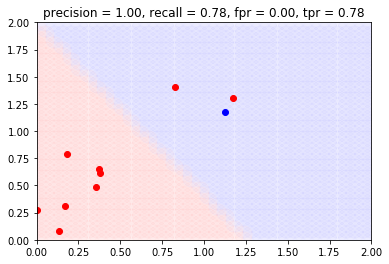

In [ ]:
plot_model_boundaries(model, xmin=0, xmax=2, ymin=0, ymax=2)
plt.scatter(x[y==0,0],x[y==0,1], color='b')
plt.scatter(x[y==1,0],x[y==1,1], color='r');
fpr, tpr, thresholds = roc_curve(y, predicted_labels)
print('fpr=', fpr)
print('tpr=', tpr)
print('thresholds=', thresholds)

plt.title("precision = {:.2f}, recall = {:.2f}, fpr = {:.2f}, tpr = {:.2f}".format(precision_score(y, predicted_labels),
                                                                                   recall_score(y, predicted_labels),
                                                                                   fpr[1], 
                                                                                   tpr[1]))
plt.show()

### Example: 大部分是 negative
* 不是所有的 positive 都被找到
* 用 precision 和 recall 會比較好
* 真實: 1 正 9 負
* 預測: 3 正 7 負

TP = 1, FN = 0, FP = 2, TN = 7

FPR = FP/(FP + TN) = 2/9 = 0.22

TPR = TP/(TP + FN) = 1/1 = 1

Precision = TP/(TP + FP) = 1/3 = 0.33

Recall = TP/(TP + FN) = 1/1 = 1

In [ ]:
np.random.seed(1)
x = np.concatenate([np.zeros((8, 2)), np.zeros((1,2)), np.zeros((1,2))]) + 0.9*np.random.rand(10,2)
x[-1,0]+=1
x[-1,-1]+=1
x[-2,0]+=0.8
x[-2,-1]+=0.8
x[-3,0]+=0.8
x[-3,-1]+=0.8
y = np.concatenate([np.zeros(7), np.ones(3)])
print('x=', x)
print('y=', y)

x= [[3.75319804e-01 6.48292044e-01]
 [1.02937336e-04 2.72099315e-01]
 [1.32080302e-01 8.31047353e-02]
 [1.67634190e-01 3.11004654e-01]
 [3.57090727e-01 4.84935061e-01]
 [3.77275063e-01 6.16697550e-01]
 [1.84007025e-01 7.90305693e-01]
 [8.24648834e-01 1.40342076e+00]
 [1.17557432e+00 1.30282085e+00]
 [1.12634824e+00 1.17829134e+00]]
y= [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]


In [ ]:
model = LinearSVC()
model.fit(x,y)
y = np.concatenate([np.zeros(9), np.ones(1)])
predicted_labels = model.predict(x)
print('prediction=', predicted_labels)

prediction= [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]


fpr= [0.         0.22222222 1.        ]
tpr= [0. 1. 1.]
thresholds= [2. 1. 0.]


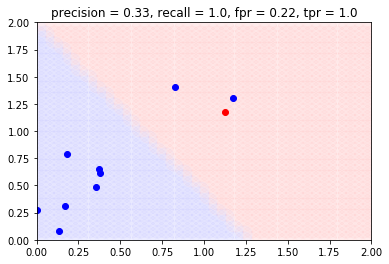

In [ ]:
plot_model_boundaries(model, xmin=0, xmax=2, ymin=0, ymax=2)
plt.scatter(x[y==0,0],x[y==0,1], color='b')
plt.scatter(x[y==1,0],x[y==1,1], color='r');
fpr, tpr, thresholds = roc_curve(y, predicted_labels)
print('fpr=', fpr)
print('tpr=', tpr)
print('thresholds=', thresholds)

plt.title("precision = {:.2f}, recall = {}, fpr = {:.2f}, tpr = {}".format(precision_score(y, predicted_labels),
                                                                                   recall_score(y, predicted_labels),
                                                                                   fpr[1], 
                                                                                   tpr[1]))
plt.show()

什麼時候看 ROC? 什麼時候看 precision 和 recall?
1. positive 比較小的時候看 **precision** 和 **recall**
      * 因為 positive 數量少，我們想要知道能不能正確地找出 positive
      * 此時能不能正確找出 negative 比較不哪麽重要
2. positive 比較大的時候看 **ROC**
      * 因為大部分是 positive 時 precision 和 recall 自然比較高，就比較沒有鑑別度
3. positive 和 negative 差不多時看 **ROC**